# Transfer Learning

## Download Inception Weights

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-11-22 11:31:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.203.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  87.8MB/s    in 1.0s    

2020-11-22 11:31:50 (87.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



## Load Weights into Model

In [4]:
import tensorflow as tf
import os


local_weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(150, 150, 3),
                                                                  include_top=False,
                                                                  weights=None)
pre_trained_model.load_weights(local_weights)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer("mixed7")
last_output = last_layer.output
print(f"Last Layer Output Shape {last_layer.output_shape}")

Last Layer Output Shape (None, 7, 7, 768)


In [ ]:
pre_trained_model.summary()

## Add Last Layers To New Model

In [6]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.models.Model(pre_trained_model.input, x)

In [7]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

## Download Data

In [8]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2020-11-22 11:42:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.217.193.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  96.0MB/s    in 0.7s    

2020-11-22 11:42:54 (96.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=40,
                                                               width_shift_range = 0.2,
                                                               height_shift_range = 0.2,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   class_mode="binary",
                                                   target_size=(150,150),
                                                   batch_size=20)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   class_mode="binary",
                                                   target_size=(150,150),
                                                   batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch=100,
                   epochs = 20, validation_steps=50,
                   verbose=2)

Epoch 1/20
100/100 - 19s - loss: 0.6086 - accuracy: 0.8610 - val_loss: 0.1128 - val_accuracy: 0.9550
Epoch 2/20
100/100 - 17s - loss: 0.1942 - accuracy: 0.9210 - val_loss: 0.0974 - val_accuracy: 0.9580
Epoch 3/20
100/100 - 19s - loss: 0.1816 - accuracy: 0.9310 - val_loss: 0.0851 - val_accuracy: 0.9690
Epoch 4/20
100/100 - 18s - loss: 0.1696 - accuracy: 0.9290 - val_loss: 0.0919 - val_accuracy: 0.9670
Epoch 5/20
100/100 - 18s - loss: 0.1653 - accuracy: 0.9355 - val_loss: 0.0947 - val_accuracy: 0.9670
Epoch 6/20
100/100 - 19s - loss: 0.1450 - accuracy: 0.9435 - val_loss: 0.0928 - val_accuracy: 0.9640
Epoch 7/20
100/100 - 19s - loss: 0.1584 - accuracy: 0.9410 - val_loss: 0.0934 - val_accuracy: 0.9680
Epoch 8/20
100/100 - 18s - loss: 0.1459 - accuracy: 0.9325 - val_loss: 0.0773 - val_accuracy: 0.9700
Epoch 9/20
100/100 - 19s - loss: 0.1328 - accuracy: 0.9500 - val_loss: 0.0792 - val_accuracy: 0.9660
Epoch 10/20
100/100 - 19s - loss: 0.1223 - accuracy: 0.9490 - val_loss: 0.0834 - val_accura

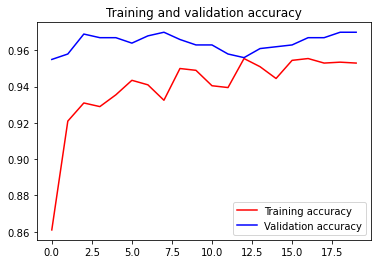

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()